# Importo las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# Cargo el dataset en memoria
digits = load_digits()

In [30]:
# Este dataset esta compuestro por representaciones matriciales que muestran un numero en concreto. Dicho numero pertenece al siguiente rango [0, 9].
# Por otro lado, la variable 'target' es una matriz con las etiquetas correspondientes para cada uno de los ejemplos que contiene el conjunto de datos

print(digits.data[:5])
print(digits.target[:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

# Visualizacion del conjunto de datos

<Figure size 640x480 with 0 Axes>

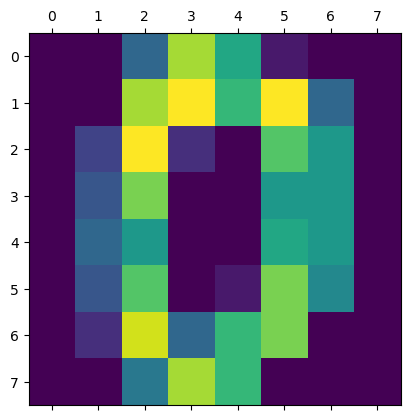

In [4]:
# EL analisis de este dataset no se va a hacer como en el resto de casos, donde este esta compuesto de variables categoricas o numericas. No es posible, al menos, de manera superficial,
# extraer mas informacion de los ejemplos de este dataset, mas alla de mostrar la representacion que forman cada uno de estos

# Muestro un grafico de Matplotlib representando el primer ejemplo del dataset
plt.figure()
plt.matshow(digits.images[0])
plt.show()

<Figure size 640x480 with 0 Axes>

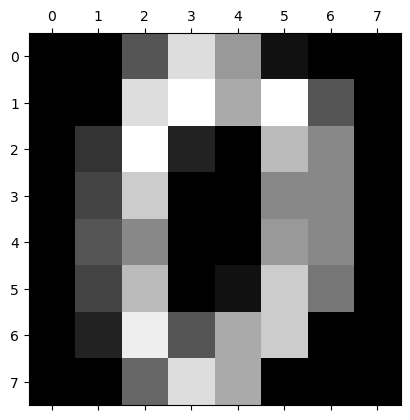

In [5]:
# Muestro un grafico de Matplotlib representando el primer ejemplo del dataset en escala de grises
plt.figure()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

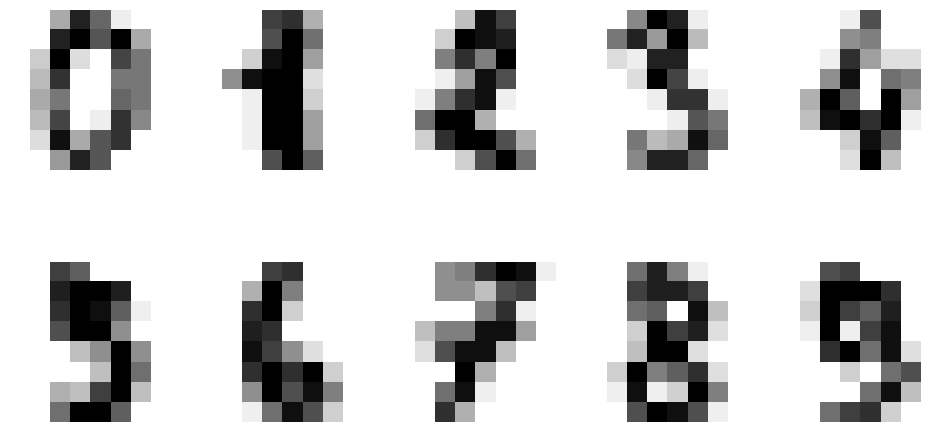

In [10]:
# Represento los diez primeros ejemplos del dataset
fig, axs = plt.subplots(2, 5, figsize = (12, 6))
for index, image in enumerate(digits.images[:10]):
    # Calculo la posición de la fila y la columna en la matriz de subplots
    row = index // 5
    col = index % 5
    
    axs[row, col].imshow(image, cmap=plt.cm.gray_r)
    
    # Desactivo los ejes para una mejor visualización
    axs[row, col].axis('off')

# Mostramos el gráfico
plt.show()

In [11]:
# Las etiquetas para los primeros 10 ejemplos representados son las siguientes:
print(digits.target[:10])

[0 1 2 3 4 5 6 7 8 9]


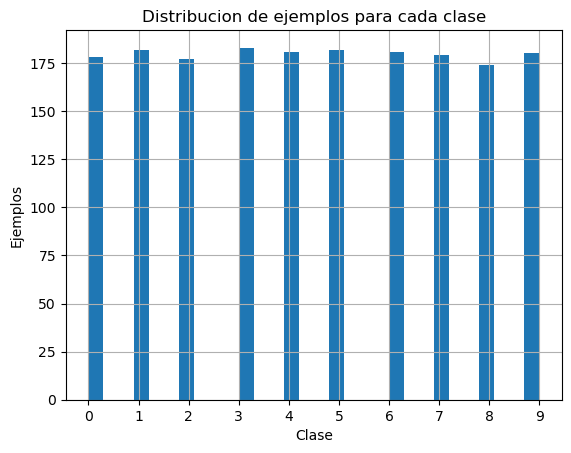

In [79]:
# Represento en un histograma el numero de ejemplos que existen para cada una de las clases (deberia existir la misma cantidad de ejemplos para todas las clases)
plt.figure()
plt.hist(digits.target, bins = 30)

plt.title("Distribucion de ejemplos para cada clase")
plt.xlabel("Clase")
plt.ylabel("Ejemplos")
plt.xticks(range(0, 10, 1))

plt.grid(True)
plt.show()

In [18]:
# Podemos ver que todos los ejemplos tienen mas de 175 ejemplos, pero existe un numero distinto de ejemplos para cada una de las clases.

# Division del conjunto de datos


In [21]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [22]:
X_train.shape

(1437, 64)

In [23]:
X_test.shape

(360, 64)

In [24]:
y_train.shape

(1437,)

In [25]:
y_test.shape

(360,)

# Desarrollo y entrenamiento del modelo

## Perceptron multicapa

In [81]:
# Pruebo a entrenar un modelo  MLPClassifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [82]:
# Muestro el coeficiente de R2 del modelo entrenado en relacion al subset de testing
model.score(X_test, y_test)

0.9777777777777777

In [83]:
# Sin haber especificado de forma manual ningun hiperparametro, el modelo logra un accuracy de 97.5%.

In [84]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

In [85]:
# Evaluo el rendimiento del modelo en una matriz de confusion, y un cuadro de clasificacion
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_mlp = confusion_matrix(y_test, y_pred)
print(conf_matrix_mlp)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      1.00      0.98        40

    accuracy                           0.98       360
   macro avg       

El resultado obtenido es practicamente perfecto. Sin embargo, voy a probar a entrenar otros modelos, a fin de comparar el rendimiento obtenido (no busco obtener un rendimiento de casi 100%, sino mas bien, averiguar si puedo obtener un rendimiento similar con otro tipo de algoritmos, que no sean de Aprendizaje Profundo)

## SVM

In [86]:
# Pruebo a entrenar un modelo SVM
from sklearn.svm import SVC

model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

# R2 con diferentes Kernels

# rbf == 0.9861
# linear == 0.9777
# poly == 0.9916
# sigmoid == 0.9

SVC(kernel='poly')

In [87]:
# Muestro el coeficiente de R2 del modelo entrenado en relacion al subset de testing
model.score(X_test, y_test)

0.9916666666666667

In [88]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

In [89]:
# Evaluo el rendimiento del modelo en una matriz de confusion, y un cuadro de clasificacion
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_svc = confusion_matrix(y_test, y_pred)
print(conf_matrix_svc)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       

La matriz de confusion de anterior y el cuadro de clasificacion, muestran los resultados de comparar y_pred obtenido con un modelo SVC con kernel 'poly', frente a los valores reales de y_test.
El resultado de la clasificacion con este kernel en SVC supera ligeramente el rendimiento obtenido con el Perceptron multicapa.

## Random Forest

In [90]:
# Pruebo a entrenar un modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
# Muestro el coeficiente de R2 del modelo entrenado en relacion al subset de testing
model.score(X_test, y_test)

0.975

In [92]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

In [93]:
# Evaluo el rendimiento del modelo en una matriz de confusion, y un cuadro de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print(conf_matrix_rf)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       

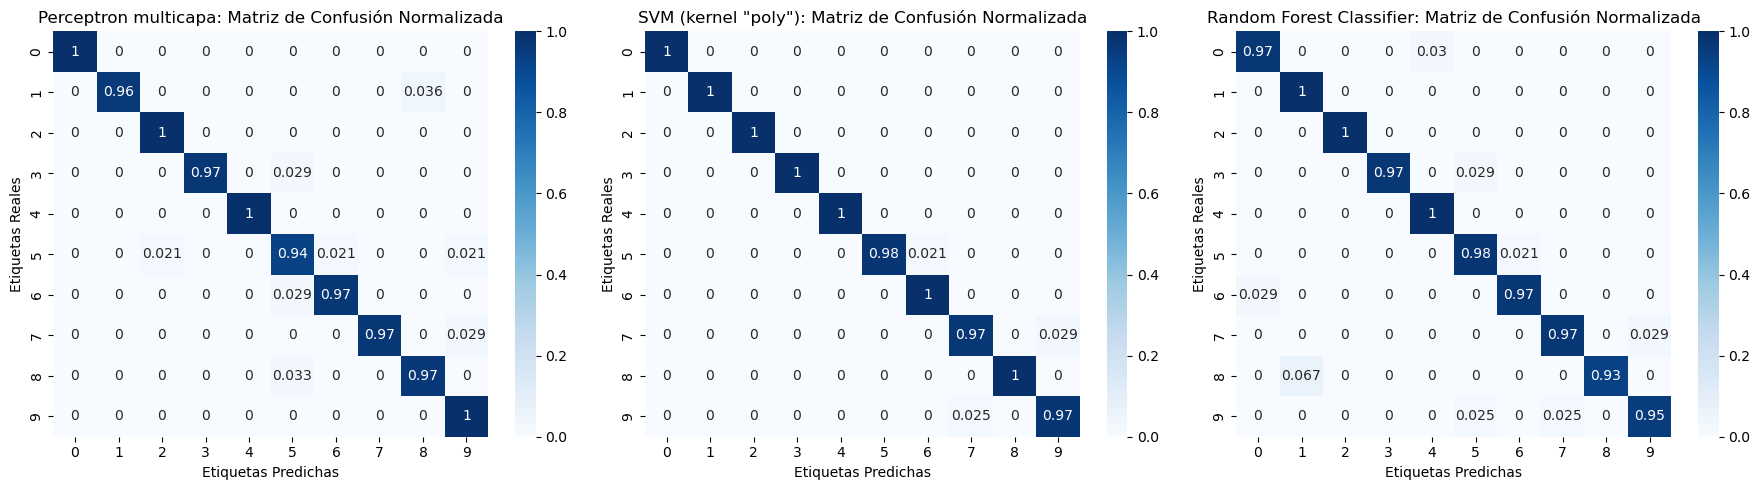

In [100]:
# Calculo las matrices de confusión para cada modelo
cm1 = conf_matrix_mlp
cm2 = conf_matrix_svc
cm3 = conf_matrix_rf

# Normalizo las matrices de confusión para obtener frecuencias en lugar de conteos
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]

# Grafico las matrices de confusión
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm1, annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Perceptron multicapa: Matriz de Confusión Normalizada')
ax[0].set_ylabel('Etiquetas Reales')
ax[0].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm2, annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('SVM (kernel "poly"): Matriz de Confusión Normalizada')
ax[1].set_ylabel('Etiquetas Reales')
ax[1].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm3, annot=True, ax=ax[2], cmap='Blues')
ax[2].set_title('Random Forest Classifier: Matriz de Confusión Normalizada')
ax[2].set_ylabel('Etiquetas Reales')
ax[2].set_xlabel('Etiquetas Predichas')


plt.tight_layout()
plt.show()

En general, los 3 modelos tienen un rendimiento muy similar, siendo algo superior en el modelo SVM con kernel polinomial. No obstante, todos los modelos probados en este notebook logran un rendimiento 
excelente al momento de clasificar nuevos ejemplos.